In [11]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Pravej@123',
    database='blinkit'
)

# 1. Identify the Top 10 Customers by Total Order Value 

In [28]:
query='''
SELECT 
    c.customer_id,
    c.customer_name,
    SUM(o.order_total) AS total_order_value
FROM customers c
JOIN orders o ON c.customer_id = o.customer_id
GROUP BY c.customer_id, c.customer_name
ORDER BY total_order_value DESC
LIMIT 10;'''
df = pd.read_sql(query, conn)
df


C:\Users\mdpra\AppData\Local\Temp\ipykernel_5512\1273787513.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_id,customer_name,total_order_value
0,22210238,Rayaan Krishna,21686.800293
1,77869660,Nidhi Sha,19052.940094
2,8791577,Warda Kohli,19028.360229
3,26285589,Bakhshi De,18912.970276
4,91196901,Atharv Kurian,18856.109741
5,17805991,Jhalak Rai,18409.900146
6,17597449,Umang Dhingra,17857.340332
7,11478478,Vedika Dugal,17719.290405
8,25128143,Odika Kannan,17638.830292
9,67092149,Daksh Atwal,17572.430145


# Visualization

C:\Users\mdpra\AppData\Local\Temp\ipykernel_5512\3945689797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='total_order_value', y='customer_name', palette='viridis')


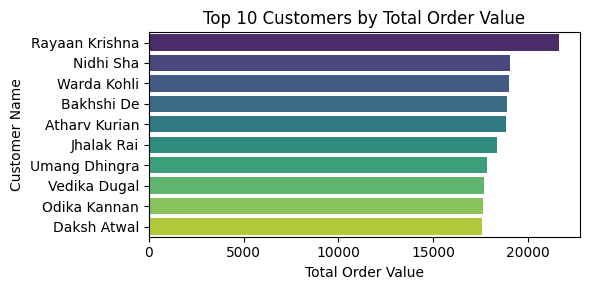

In [35]:
# Set figure size
plt.figure(figsize=(6,3))

# Barplot: total_order_value vs customer_name
sns.barplot(data=df, x='total_order_value', y='customer_name', palette='viridis')

# Titles and labels
plt.title('Top 10 Customers by Total Order Value')
plt.xlabel('Total Order Value')
plt.ylabel('Customer Name')
plt.tight_layout()

# Show plot
plt.show()


# 2. Count the number of customers in each segment (Premium, Regular, Inactive, New)

In [2]:
query = '''
SELECT 
    customer_segment,
    COUNT(*) AS customer_count
FROM customers
GROUP BY customer_segment;
'''

df = pd.read_sql(query, conn)
df


C:\Users\mdpra\AppData\Local\Temp\ipykernel_20892\2550106326.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,customer_segment,customer_count
0,Premium,633
1,Inactive,600
2,Regular,639
3,New,628


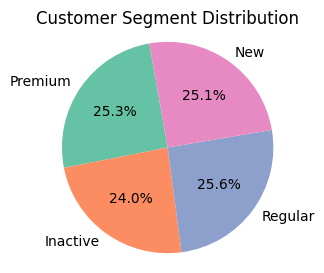

In [40]:
plt.figure(figsize=(3,3))
plt.pie(df_segment['customer_count'], labels=df_segment['customer_segment'], autopct='%1.1f%%', startangle=100, colors=sns.color_palette('Set2'))
plt.title('Customer Segment Distribution')
plt.axis('equal')
plt.show()


# 3. Find customers with an average order value above 500 and more than 10 orders

In [5]:
query = '''
select customer_id,customer_name, avg_order_value,total_orders
from customers
where avg_order_value>=500
and total_orders>=10;
'''

df= pd.read_sql(query, conn)
df


C:\Users\mdpra\AppData\Local\Temp\ipykernel_10696\1880405162.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql(query, conn)


,customer_id,customer_name,avg_order_value,total_orders
0,47822591,Hema Bahri,1969.81,17
1,57102800,Januja Verma,578.14,14
2,16379942,Harshil Kuruvilla,1370.56,15
3,11071601,Ojas Ahuja,1950.54,17
4,80404839,Kashish Dora,1537.35,10
...,...,...,...,...
1147,75732571,Garima Behl,1981.72,20
1148,39681023,Pranit Randhawa,1084.73,16
1149,66827191,Om Bhatia,1808.42,11
1150,48002829,Daksh Mandal,754.33,17


# 4. List orders that were delivered late along with reasons for delay.


In [17]:
query = '''
SELECT 
    dp.order_id,
    o.customer_id,
    c.customer_name,
    dp.promised_time,
    dp.actual_time,
    dp.delivery_status,
    dp.reasons_if_delayed
FROM delivery_performance dp
JOIN orders o ON dp.order_id = o.order_id
JOIN customers c ON o.customer_id = c.customer_id
WHERE dp.delivery_status IN ('slightly delayed', 'significantly delayed');
'''

df_late_deliveries = pd.read_sql(query, conn)
df_late_deliveries


C:\Users\mdpra\AppData\Local\Temp\ipykernel_10696\3362399664.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_late_deliveries = pd.read_sql(query, conn)


,order_id,customer_id,customer_name,promised_time,actual_time,delivery_status,reasons_if_delayed
0,6833977302,97475543,Niharika Nagi,2023-06-05 04:57:35,2023-06-05 05:22:35,Significantly Delayed,Traffic
1,4928556641,97475543,Niharika Nagi,2023-09-19 15:11:57,2023-09-19 15:18:57,Slightly Delayed,Traffic
2,2770948451,22077605,Megha Sachar,2023-04-27 08:03:43,2023-04-27 08:22:43,Significantly Delayed,Traffic
3,4903335316,47822591,Hema Bahri,2023-04-30 19:51:17,2023-04-30 20:01:17,Slightly Delayed,Traffic
4,8875274470,57102800,Januja Verma,2024-04-20 16:38:48,2024-04-20 17:03:48,Significantly Delayed,Traffic
...,...,...,...,...,...,...,...
1525,515408216,3408982,Tripti Chakraborty,2023-12-25 09:50:58,2023-12-25 09:59:58,Slightly Delayed,Traffic
1526,9993542681,42589311,Yadavi Uppal,2023-05-23 04:26:41,2023-05-23 04:41:41,Slightly Delayed,Traffic
1527,9000165912,65895091,Chaitaly Shere,2023-08-20 08:34:44,2023-08-20 08:57:44,Significantly Delayed,Traffic
1528,6585436114,65895091,Chaitaly Shere,2024-03-13 22:01:46,2024-03-13 22:08:46,Slightly Delayed,Traffic


# 5. Calculate the average delivery time (in minutes) per delivery partner.

In [14]:
query = '''
SELECT 
    delivery_partner_id,
    ROUND(AVG(TIMESTAMPDIFF(MINUTE, promised_time, actual_time)), 2) AS avg_delivery_delay_minutes
FROM delivery_performance
GROUP BY delivery_partner_id;
'''

df_avg_delay = pd.read_sql(query, conn)
df_avg_delay


C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\2960381878.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_avg_delay = pd.read_sql(query, conn)


,delivery_partner_id,avg_delivery_delay_minutes
0,63230,-5.0
1,14983,2.0
2,39859,4.0
3,61497,-1.0
4,84315,1.0
...,...,...
4995,90914,5.0
4996,27952,-2.0
4997,9590,3.0
4998,29940,-2.0


# 6. Find the top 5 stores by total order revenue.


In [16]:
query = '''
SELECT 
    store_id,
    ROUND(SUM(order_total), 2) AS total_revenue
FROM orders
GROUP BY store_id
ORDER BY total_revenue DESC
LIMIT 5;
'''

df_top_stores = pd.read_sql(query, conn)
df_top_stores


C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\579259618.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top_stores = pd.read_sql(query, conn)


,store_id,total_revenue
0,523,6721.46
1,2409,6543.19
2,2334,6458.90
3,6124,6173.45
4,103,6161.48


# 7. Identify products that have had damaged stock more than 5 times in total


In [17]:
query = '''
SELECT 
    p.product_id,
    p.product_name,
    SUM(i.damaged_stock) AS total_damaged
FROM inventory i
JOIN products p ON i.product_id = p.product_id
GROUP BY p.product_id, p.product_name
HAVING total_damaged > 5;
'''

df_damaged_products = pd.read_sql(query, conn)
df_damaged_products


C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\1845711128.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_damaged_products = pd.read_sql(query, conn)


,product_id,product_name,total_damaged
0,153019,Onions,310.0
1,848226,Tomatoes,284.0
2,965755,Bananas,326.0
3,39154,Mangoes,318.0
4,34186,Mangoes,308.0
...,...,...,...
263,961614,Chocolates,288.0
264,63769,Lotion,302.0
265,563740,Chips,322.0
266,764014,Salt,248.0


 # 8. Calculate the total quantity ordered for each product


In [18]:
query = '''
SELECT 
    p.product_id,
    p.product_name,
    SUM(oi.quantity) AS total_quantity_ordered
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_id, p.product_name
ORDER BY total_quantity_ordered DESC;
'''

df_quantity_per_product = pd.read_sql(query, conn)
df_quantity_per_product


C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\1323063729.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_quantity_per_product = pd.read_sql(query, conn)


,product_id,product_name,total_quantity_ordered
0,51036,Baby Food,70.0
1,820973,Baby Wipes,68.0
2,604184,Toilet Cleaner,62.0
3,34186,Mangoes,61.0
4,992178,Pain Reliever,60.0
...,...,...,...
263,154179,Pain Reliever,20.0
264,741341,Eggs,19.0
265,133542,Detergent,17.0
266,890623,Onions,13.0


C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\770033258.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_quantity, x='total_quantity_ordered', y='product_name', palette='Blues_r')


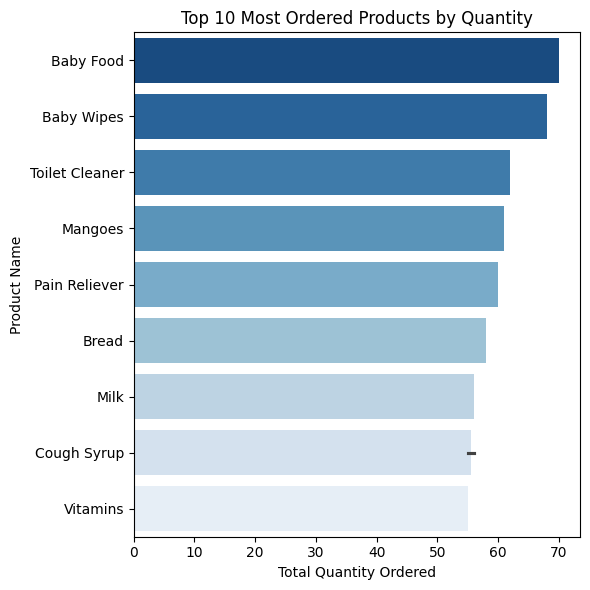

In [21]:
top10_quantity = df_quantity_per_product.head(10)

plt.figure(figsize=(6,6))
sns.barplot(data=top10_quantity, x='total_quantity_ordered', y='product_name', palette='Blues_r')

plt.title("Top 10 Most Ordered Products by Quantity")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


 # 9. Find products that often fall below the minimum stock level (compare current stock with min stock).


In [18]:
query = '''
SELECT 
    products.product_id, 
    products.product_name,
    SUM(order_items.quantity) AS current_quantity, 
    SUM(min_stock_level) AS min_stock
FROM products 
LEFT JOIN order_items ON products.product_id = order_items.product_id
GROUP BY products.product_id, products.product_name
HAVING SUM(order_items.quantity) < SUM(min_stock_level);
'''

# ✅ Run query and load into DataFrame
df_low_stock = pd.read_sql(query, conn)

# ✅ Display DataFrame
df_low_stock

C:\Users\mdpra\AppData\Local\Temp\ipykernel_10696\2509450336.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_low_stock = pd.read_sql(query, conn)


,product_id,product_name,current_quantity,min_stock
0,153019,Onions,41.0,247.0
1,11422,Potatoes,27.0,300.0
2,669378,Potatoes,41.0,460.0
3,848226,Tomatoes,31.0,190.0
4,890623,Onions,13.0,243.0
...,...,...,...,...
263,444361,Pain Reliever,50.0,420.0
264,679284,Cough Syrup,42.0,588.0
265,240179,Cough Syrup,41.0,400.0
266,673058,Cough Syrup,56.0,780.0


# 10. calculate total revenue generated and roas for each marketing campaign.

In [22]:
query = '''
select campaign_name, sum(revenue_generated) AS total_revenue,
sum(spend) as total_spend,
(sum(revenue_generated) / sum(spend)) as campaign_roas
from marketing_performance
group by campaign_name;
'''

df_marketing_roas = pd.read_sql(query, conn)
df_marketing_roas


C:\Users\mdpra\AppData\Local\Temp\ipykernel_10696\47966263.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_marketing_roas = pd.read_sql(query, conn)


,campaign_name,total_revenue,total_spend,campaign_roas
0,New User Discount,3.603860e+06,1.833455e+06,1.965612
1,Weekend Special,3.571452e+06,1.799611e+06,1.984568
2,Festival Offer,3.507064e+06,1.796687e+06,1.951961
3,Flash Sale,3.556087e+06,1.831688e+06,1.941426
4,Membership Drive,3.524951e+06,1.790070e+06,1.969170
5,Category Promotion,3.582455e+06,1.850583e+06,1.935852
6,App Push Notification,3.554370e+06,1.788989e+06,1.986803
7,Email Campaign,3.601785e+06,1.810730e+06,1.989135
8,Referral Program,3.691383e+06,1.818026e+06,2.030435


 # 11. Find the campaign with the highest conversion rate

In [14]:
query = '''
select campaign_name,
sum(conversions) AS total_conversions,
sum(impressions) AS total_impressions,
(sum(conversions) / sum(impressions)) AS conversion_rate
from marketing_performance
group by campaign_name
ORDER BY conversion_rate DESC
LIMIT 1; 
'''
df_best_campaign = pd.read_sql(query, conn)
df_best_campaign


C:\Users\mdpra\AppData\Local\Temp\ipykernel_10696\3175993665.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_best_campaign = pd.read_sql(query, conn)


,campaign_name,total_conversions,total_impressions,conversion_rate
0,App Push Notification,32783.0,3130007.0,0.0105


# 12. List all campaigns targeted at Premium customers with performance metrics

In [35]:
query = '''
SELECT 
    campaign_id,
    campaign_name,
    impressions,
    conversions,
    ROUND((conversions / impressions) * 100, 2) AS conversion_rate,
    spend
FROM marketing_performance
WHERE target_audience = 'Premium';
'''
df_premium = pd.read_sql(query, conn)
df_premium




C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\801473103.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_premium = pd.read_sql(query, conn)


,campaign_id,campaign_name,impressions,conversions,conversion_rate,spend
0,548299,New User Discount,3130,78,2.49,1431.85
1,875646,App Push Notification,4752,21,0.44,3584.76
2,5516,Email Campaign,1559,68,4.36,1457.88
3,362255,Referral Program,1997,92,4.61,3328.47
4,588949,New User Discount,7171,22,0.31,3120.88
...,...,...,...,...,...,...
1350,253182,Festival Offer,1839,47,2.56,1400.73
1351,792914,Referral Program,5805,80,1.38,4487.51
1352,910029,Membership Drive,4705,35,0.74,3550.33
1353,203042,Email Campaign,8554,85,0.99,1912.22


C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\559364223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_premium, x="campaign_name", y="conversion_rate", palette="cool")


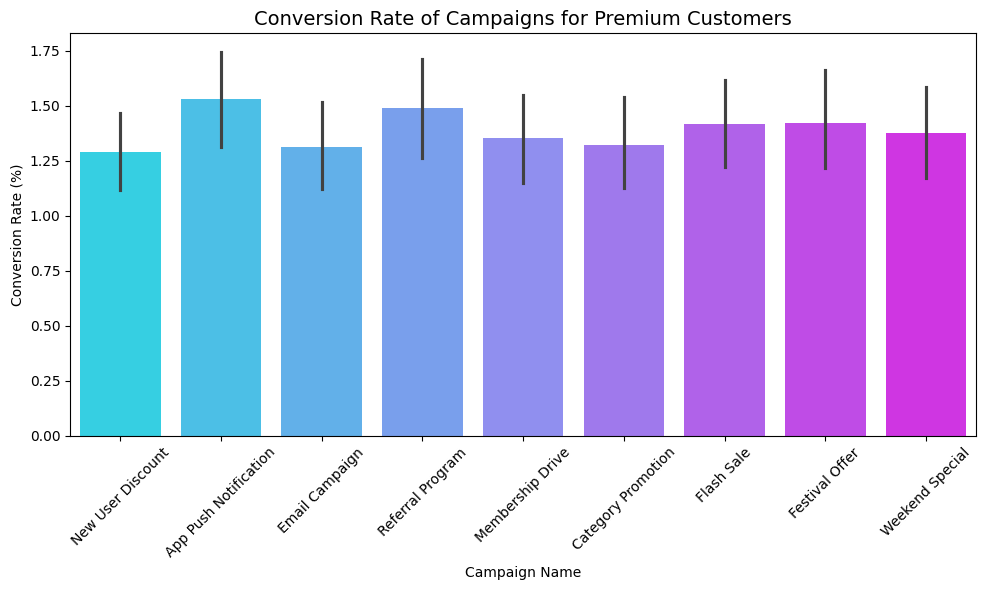

In [40]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=df_premium, x="campaign_name", y="conversion_rate", palette="cool")
plt.title("Conversion Rate of Campaigns for Premium Customers", fontsize=14)
plt.xlabel("Campaign Name")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 13. Count feedback entries by sentiment (Positive, Neutral, Negative)

In [42]:
query = '''
SELECT 
    sentiment,
    COUNT(*) AS feedback_count
FROM customer_feedback
GROUP BY sentiment;
'''
df_sentiment = pd.read_sql(query, conn)
df_sentiment



C:\Users\mdpra\AppData\Local\Temp\ipykernel_15640\1769163097.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_sentiment = pd.read_sql(query, conn)


,sentiment,feedback_count
0,Neutral,1738
1,Negative,1642
2,Positive,1620


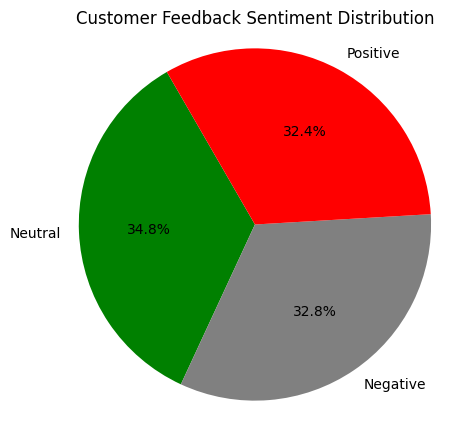

In [45]:
plt.figure(figsize=(5, 5))
colors = ['green', 'grey', 'red']
plt.pie(df_sentiment['feedback_count'], labels=df_sentiment['sentiment'], autopct='%1.1f%%', colors=colors, startangle=120)
plt.title("Customer Feedback Sentiment Distribution")
plt.axis('equal')
plt.show()

# 14. List customers who gave negative feedback with their orders

In [21]:
query = '''
SELECT 
    cf.customer_id,
    c.customer_name,
    cf.order_id,
    cf.sentiment,
    cf.feedback_text
FROM customer_feedback cf
JOIN customers c ON cf.customer_id = c.customer_id
WHERE sentiment = 'Negative';
'''
df_negative_feedback = pd.read_sql(query, conn)
df_negative_feedback


C:\Users\mdpra\AppData\Local\Temp\ipykernel_10696\3275196890.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_negative_feedback = pd.read_sql(query, conn)


,customer_id,customer_name,order_id,sentiment,feedback_text
0,97475543,Niharika Nagi,7147677361,Negative,Taste was not as expected.
1,97475543,Niharika Nagi,6833977302,Negative,Not worth the price I paid.
2,22077605,Megha Sachar,2770948451,Negative,Product was damaged during delivery.
3,47822591,Hema Bahri,4903335316,Negative,The packaging was poor.
4,54748429,Darsh More,6962915277,Negative,Taste was not as expected.
...,...,...,...,...,...
1637,69242672,Ranveer Sheth,4393804577,Negative,Very disappointed with the quality.
1638,69242672,Ranveer Sheth,1227108607,Negative,I had a bad experience.
1639,3408982,Tripti Chakraborty,5938542755,Negative,Delivery was late and I was unhappy.
1640,97484394,Ayush Choudhry,1247978468,Negative,The order was incorrect.
